bs cutoff 95
ls cutoff 111
tc cutoff 55
mp cutoff 56


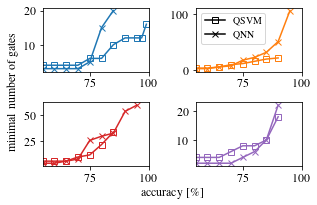

In [3]:
import numpy as np
import pylab as plt
from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec
from matplotlib.path import Path
import matplotlib.colors
import array
import math

from matplotlib.lines import Line2D


import matplotlib as mpl

mpl.rcParams.update({'text.usetex':True,'font.size': 12, 'font.family': 'serif', 'font.serif': ['Times', 'Computer Modern']})


def readGate(gateFile,cutoff='nan'):
	qubit = []	#id of the used qubit
	weight = []	#weight by which the angle is rotated
	layer = []	#in which layer a gate is occupied (important for gates that act on two qubits)
	gateData = open(gateFile,'r')
	layer_collect = 1
	count = 0
	for data in gateData:
		if count == cutoff:
			break
		line = data.split('\t')
		for l in range(len(line)-2):
			if line[l] == '111111': pass
			else:
				qubit.append(l)
				layer.append(layer_collect)
				weight.append(float(line[-2]))
				if line[l] == 'Rxx_x' or line[l] == 'Ryy_x' or line[l] == 'Rzz_x':
					qubit.append(l-1)
					layer.append(layer_collect)
					weight.append(float(line[-2]))
				layer_collect+=1
		if cutoff == 'nan': pass
		else:count+=1
	return [qubit,weight,layer]

#import data
#bars-and-stripes
path = 'Data_TA/BS/'
test0 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
barsStripes = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
barsStripes_train = [test0,test1,(test0+test1)*0.5]
barsStripes_qubit,barsStripes_weight,barsStripes_layer = readGate(path+'Gate_collect.txt','nan')

#linearly-separable 10d
path = 'Data_TA/LS/'
test0 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
linearSep10d = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=0,skip_header=1)[:94]
test1 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=1,skip_header=1)[:94]
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
linearSep10d_train = [test0,test1,(test0+test1)*0.5]
linearSep10d_qubit,linearSep10d_weight,linearSep10d_layer = readGate(path+'Gate_collect.txt','nan')

#two-curves 10d
path = 'Data_TA/TC/'

test0 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
twoCurves10d = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=0,skip_header=1)[:67]
test1 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=1,skip_header=1)[:67]
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
twoCurves10d_train = [test0,test1,(test0+test1)*0.5]
twoCurves10d_qubit,twoCurves10d_weight,twoCurves10d_layer = readGate(path+'Gate_collect.txt','nan')


#mnist-pca
path = 'Data_TA/MN/'
test0 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
mnistPca = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
mnistPca_train = [test0,test1,(test0+test1)*0.5]
mnistPca_qubit,mnistPca_weight,mnistPca_layer = readGate(path+'Gate_collect_1000_10d.txt','nan')

cross = np.array([55,60,65,70,75,80,85,90,95,97,99])
init_cross = []
for i in range(len(cross)):
	init_cross.append(float('nan'))

TC_cross = init_cross.copy()
for i in range(len(twoCurves10d[2])):
	for j in range(len(cross)):
		if twoCurves10d[2][i]*100>cross[j] and math.isnan(TC_cross[j]):
			TC_cross[j] = i+1
LS_cross = init_cross.copy()
for i in range(len(linearSep10d[2])):
	for j in range(len(cross)):
		if linearSep10d[2][i]*100>cross[j] and math.isnan(LS_cross[j]):
			LS_cross[j] = i+1	
BS_cross = init_cross.copy()
for i in range(len(barsStripes[2])):
	for j in range(len(cross)):
		if barsStripes[2][i]*100>cross[j] and math.isnan(BS_cross[j]):
			BS_cross[j] = i+1	
MP_cross = init_cross.copy()
for i in range(len(mnistPca[2])):
	for j in range(len(cross)):
		if mnistPca[2][i]*100>cross[j] and math.isnan(MP_cross[j]):
			MP_cross[j] = i+1		
	

def cutCost(cost):
	cutoff = 'nan'
	if len(cost)>2:
		for i in range(2,len(cost)):
			if abs(cost[i]-cost[i-2])<1e-3:
				cutoff = i
				break
	return cutoff
	

#import data
#bars-and-stripes
path = 'Data_QNN/logLossBS/'
test0 = np.genfromtxt(path+'ACC_test.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
barsStripes = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
barsStripes_train = [test0,test1,(test0+test1)*0.5]
barsStripes_cost_gate = np.genfromtxt(path+'Cost_collect.txt',usecols=0)
barsStripes_cost = np.genfromtxt(path+'Cost_collect.txt',usecols=1)
cutoff = cutCost(barsStripes_cost)
barsStripes_qubit,barsStripes_weight,barsStripes_layer = readGate(path+'Gate_collect.txt',cutoff)
print('bs cutoff',cutoff)
if cutoff !='nan':
	barsStripes = [barsStripes[0][:cutoff],barsStripes[1][:cutoff],barsStripes[2][:cutoff]]
	barsStripes_train = [barsStripes_train[0][:cutoff],barsStripes_train[1][:cutoff],barsStripes_train[2][:cutoff]]
	barsStripes_cost_gate = barsStripes_cost_gate[:cutoff]
	barsStripes_cost = barsStripes_cost[:cutoff]

#linearly-separable 10d
path = 'Data_QNN/logLossLS/'
test0 = np.genfromtxt(path+'ACC_test.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
linearSep10d = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
linearSep10d_train = [test0,test1,(test0+test1)*0.5]
linearSep10d_cost_gate = np.genfromtxt(path+'Cost_collect.txt',usecols=0)
linearSep10d_cost = np.genfromtxt(path+'Cost_collect.txt',usecols=1)
cutoff = cutCost(linearSep10d_cost)
linearSep10d_qubit,linearSep10d_weight,linearSep10d_layer = readGate(path+'Gate_collect.txt',cutoff)
print('ls cutoff',cutoff)
if cutoff !='nan':
	linearSep10d = [linearSep10d[0][:cutoff],linearSep10d[1][:cutoff],linearSep10d[2][:cutoff]]
	linearSep10d_train = [linearSep10d_train[0][:cutoff],linearSep10d_train[1][:cutoff],linearSep10d_train[2][:cutoff]]
	linearSep10d_cost_gate = linearSep10d_cost_gate[:cutoff]
	linearSep10d_cost = linearSep10d_cost[:cutoff]

#two-curves 10d
path = 'Data_QNN/logLossTC/'
test0 = np.genfromtxt(path+'ACC_test.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
twoCurves10d = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
twoCurves10d_train = [test0,test1,(test0+test1)*0.5]
twoCurves10d_cost_gate = np.genfromtxt(path+'Cost_collect.txt',usecols=0)
twoCurves10d_cost = np.genfromtxt(path+'Cost_collect.txt',usecols=1)
cutoff = cutCost(twoCurves10d_cost)
twoCurves10d_qubit,twoCurves10d_weight,twoCurves10d_layer = readGate(path+'Gate_collect.txt',cutoff)
print('tc cutoff',cutoff)
if cutoff !='nan':
	twoCurves10d = [twoCurves10d[0][:cutoff],twoCurves10d[1][:cutoff],twoCurves10d[2][:cutoff]]
	twoCurves10d_train = [twoCurves10d_train[0][:cutoff],twoCurves10d_train[1][:cutoff],twoCurves10d_train[2][:cutoff]]
	twoCurves10d_cost_gate = twoCurves10d_cost_gate[:cutoff]
	twoCurves10d_cost = twoCurves10d_cost[:cutoff]

#mnist-pca
path = 'Data_QNN/logLossMN/'
test0 = np.genfromtxt(path+'ACC_test.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
mnistPca = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
mnistPca_train = [test0,test1,(test0+test1)*0.5]
mnistPca_cost_gate = np.genfromtxt(path+'Cost_collect.txt',usecols=0)
mnistPca_cost = np.genfromtxt(path+'Cost_collect.txt',usecols=1)
cutoff = cutCost(mnistPca_cost)
mnistPca_qubit,mnistPca_weight,mnistPca_layer = readGate(path+'Gate_collect.txt',cutoff)
print('mp cutoff',cutoff)
if cutoff !='nan':
	mnistPca = [mnistPca[0][:cutoff],mnistPca[1][:cutoff],mnistPca[2][:cutoff]]
	mnistPca_train = [mnistPca_train[0][:cutoff],mnistPca_train[1][:cutoff],mnistPca_train[2][:cutoff]]
	mnistPca_cost_gate = mnistPca_cost_gate[:cutoff]
	mnistPca_cost = mnistPca_cost[:cutoff]





TC_cross_NN = init_cross.copy()
for i in range(len(twoCurves10d[2])):
	for j in range(len(cross)):
		if twoCurves10d[2][i]*100>cross[j] and math.isnan(TC_cross_NN[j]):
			TC_cross_NN[j] = i+1
LS_cross_NN = init_cross.copy()
for i in range(len(linearSep10d[2])):
	for j in range(len(cross)):
		if linearSep10d[2][i]*100>cross[j] and math.isnan(LS_cross_NN[j]):
			LS_cross_NN[j] = i+1	
BS_cross_NN = init_cross.copy()
for i in range(len(barsStripes[2])):
	for j in range(len(cross)):
		if barsStripes[2][i]*100>cross[j] and math.isnan(BS_cross_NN[j]):
			BS_cross_NN[j] = i+1	
MP_cross_NN = init_cross.copy()
for i in range(len(mnistPca[2])):
	for j in range(len(cross)):
		if mnistPca[2][i]*100>cross[j] and math.isnan(MP_cross_NN[j]):
			MP_cross_NN[j] = i+1	



fig = plt.figure(figsize = (11.69*0.4,8.27*0.38))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2,sharex=ax1)#,sharey=ax1)
ax3 = plt.subplot(2,2,3,sharex=ax1)#,sharey=ax1)
ax4 = plt.subplot(2,2,4,sharex=ax1)#,sharey=ax1)

ax1.plot(cross,2*np.array(TC_cross),'-s',color='tab:blue',fillstyle='none',label='two curves, QSVM')
ax2.plot(cross,2*np.array(LS_cross),'-s',color='tab:orange',fillstyle='none',label='linearly separable, QSVM')
ax3.plot(cross,2*np.array(BS_cross),'-s',color='tab:red',fillstyle='none',label='bars and stripes, QSVM')
ax4.plot(cross,2*np.array(MP_cross),'-s',color='tab:purple',fillstyle='none',label='MNIST PCA, QSVM')


ax1.plot(cross,TC_cross_NN,'-x',color='tab:blue',label='two curves, QNN')
ax2.plot(cross,LS_cross_NN,'-x',color='tab:orange',label='linearly separable, QNN')
ax3.plot(cross,BS_cross_NN,'-x',color='tab:red',label='bars and stripes, QNN')
ax4.plot(cross,MP_cross_NN,'-x',color='tab:purple',label='MNIST PCA, QNN')

ax1.set_xlim(55,100)

labels = ['QSVM','QNN']
handles = [Line2D([0], [0], color='black', linestyle='-',marker='s',fillstyle='none'),
	Line2D([0], [0], color='black', linestyle='-',marker='x')]

ax2.legend(handles,labels,fontsize='small')

fig.supylabel('minimal number of gates',y=0.57,x=0.06,fontsize='medium')
fig.supxlabel('accuracy [\%]',y=0.1,x=0.55,fontsize='medium')

fig.tight_layout()
fig.savefig('MinGateNeeded.pdf')
plt.show()